<a href="https://colab.research.google.com/github/gabriela-du/challenge01/blob/main/Challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Faturamento total de cada loja
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

In [3]:
print("Faturamento Loja 1:", faturamento_loja1)
print("Faturamento Loja 2:", faturamento_loja2)
print("Faturamento Loja 3:", faturamento_loja3)
print("Faturamento Loja 4:", faturamento_loja4)

Faturamento Loja 1: 1534509.12
Faturamento Loja 2: 1488459.06
Faturamento Loja 3: 1464025.03
Faturamento Loja 4: 1384497.58


# 2. Vendas por Categoria


In [12]:
resumo_categorias = {
    "Loja 1": loja.groupby("Categoria do Produto")["Produto"].count(),
    "Loja 2": loja2.groupby("Categoria do Produto")["Produto"].count(),
    "Loja 3": loja3.groupby("Categoria do Produto")["Produto"].count(),
    "Loja 4": loja4.groupby("Categoria do Produto")["Produto"].count()
}

# Unindo em um único DataFrame
df_resumo_categorias = pd.DataFrame(resumo_categorias).fillna(0).astype(int)

In [13]:
print("Resumo de vendas por categoria em todas as lojas:")
print(df_resumo_categorias)

Resumo de vendas por categoria em todas as lojas:
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201


# 3. Média de Avaliação das Lojas

In [19]:
media_avaliacao_loja1 = loja["Avaliação da compra"].mean().round(2)
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean().round(2)
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean().round(2)
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean().round(2)

In [20]:
print("Média Avaliação Loja 1:", media_avaliacao_loja1)
print("Média Avaliação Loja 2:", media_avaliacao_loja2)
print("Média Avaliação Loja 3:", media_avaliacao_loja3)
print("Média Avaliação Loja 4:", media_avaliacao_loja4)

Média Avaliação Loja 1: 3.98
Média Avaliação Loja 2: 4.04
Média Avaliação Loja 3: 4.05
Média Avaliação Loja 4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [21]:
def produtos_destaque(df, nome_loja, coluna_produto="Produto"):
    vendas = df.groupby(coluna_produto).size().sort_values(ascending=False)

    print(f"=== {nome_loja} ===")
    print("Mais vendidos:")
    print(vendas.head(5))  # top 5
    print("\nMenos vendidos:")
    print(vendas.tail(5))  # últimos 5
    print("\n")
    return vendas

# Analisar cada loja
vendas_loja1 = produtos_destaque(loja, "Loja 1")
vendas_loja2 = produtos_destaque(loja2, "Loja 2")
vendas_loja3 = produtos_destaque(loja3, "Loja 3")
vendas_loja4 = produtos_destaque(loja4, "Loja 4")

=== Loja 1 ===
Mais vendidos:
Produto
TV Led UHD 4K         60
Micro-ondas           60
Guarda roupas         60
Secadora de roupas    58
Blocos de montar      56
dtype: int64

Menos vendidos:
Produto
Ciência de dados com python    39
Pandeiro                       36
Panela de pressão              35
Celular ABXY                   33
Headset                        33
dtype: int64


=== Loja 2 ===
Mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
dtype: int64

Menos vendidos:
Produto
Fone de ouvido       37
Poltrona             35
Impressora           34
Mesa de jantar       34
Jogo de tabuleiro    32
dtype: int64


=== Loja 3 ===
Mais vendidos:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Cômoda             55
Jogo de panelas    55
dtype: int64

Menos vendidos:
Produto
Copo térmico        38
Micro-ondas         36
Jogo de copos   

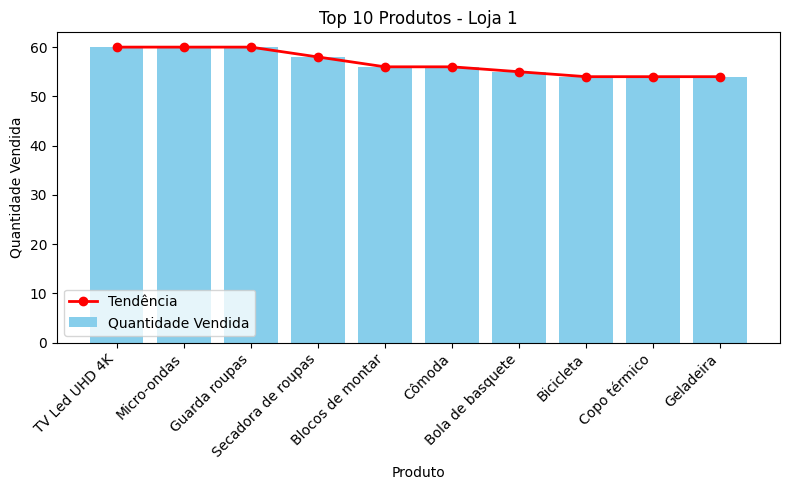

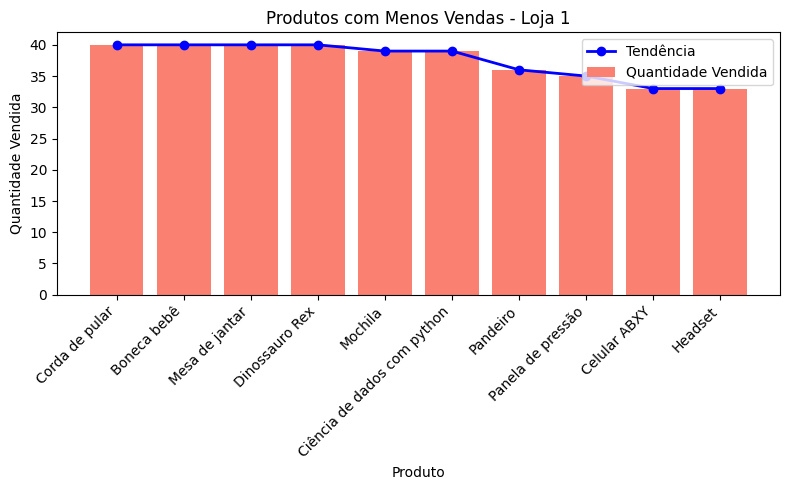

In [34]:
import matplotlib.pyplot as plt

# --- Top 10 mais vendidos (coluna + linha) ---
top10 = vendas_loja1.head(10)

plt.figure(figsize=(8,5))
# Colunas
plt.bar(top10.index, top10.values, color="skyblue", label="Quantidade Vendida")
# Linha
plt.plot(top10.index, top10.values, color="red", marker="o", linewidth=2, label="Tendência")

plt.title("Top 10 Produtos - Loja 1")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


# --- 10 menos vendidos (coluna + linha) ---
bottom10 = vendas_loja1.tail(10)

plt.figure(figsize=(8,5))
# Colunas
plt.bar(bottom10.index, bottom10.values, color="salmon", label="Quantidade Vendida")
# Linha
plt.plot(bottom10.index, bottom10.values, color="blue", marker="o", linewidth=2, label="Tendência")

plt.title("Produtos com Menos Vendas - Loja 1")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


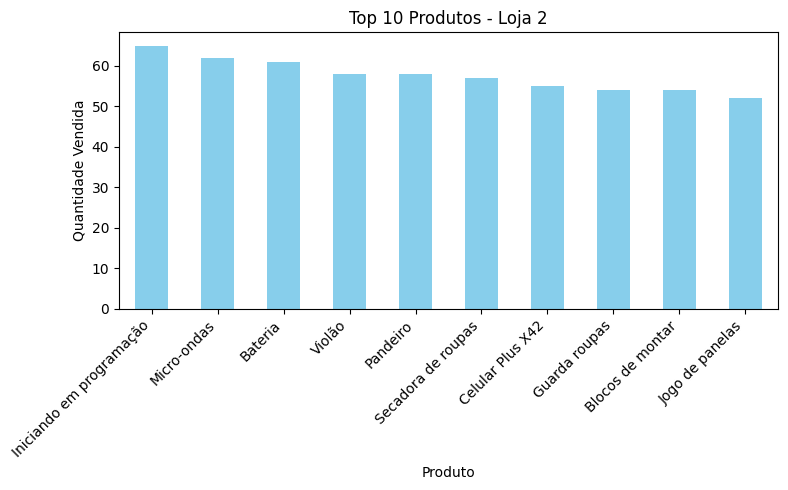

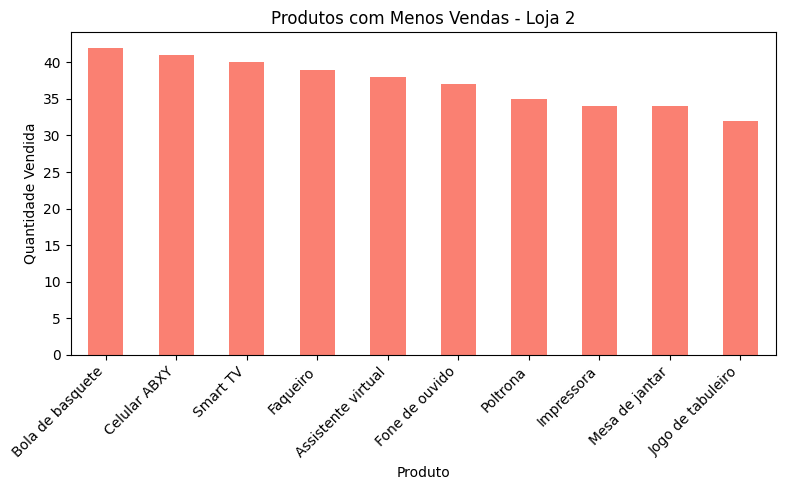

In [33]:
import matplotlib.pyplot as plt

# Top 10 mais vendidos da Loja 2 (colunas verticais)
vendas_loja2.head(10).plot(
    kind="bar",
    figsize=(8,5),
    title="Top 10 Produtos - Loja 2",
    color="skyblue"
)
plt.ylabel("Quantidade Vendida")
plt.xlabel("Produto")
plt.xticks(rotation=45, ha="right")  # gira os rótulos p/ não sobrepor
plt.tight_layout()
plt.show()

# 10 menos vendidos da Loja 2 (colunas verticais vermelhas)
vendas_loja2.tail(10).plot(
    kind="bar",
    figsize=(8,5),
    title="Produtos com Menos Vendas - Loja 2",
    color="salmon"
)
plt.ylabel("Quantidade Vendida")
plt.xlabel("Produto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

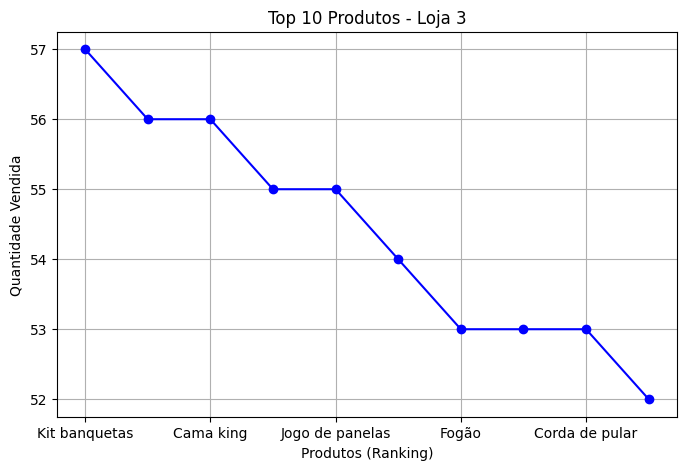

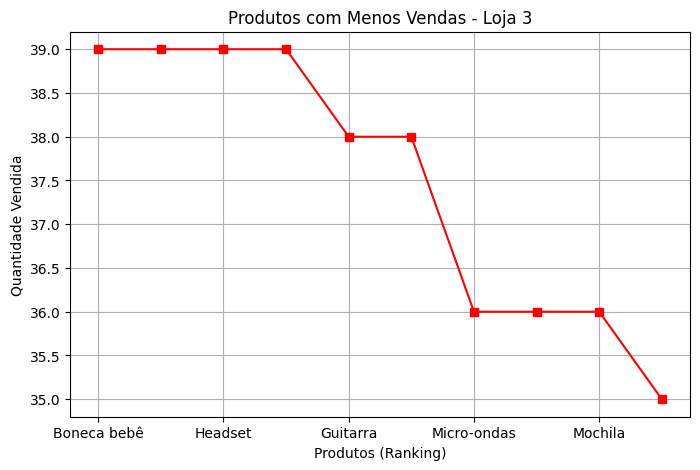

In [35]:
import matplotlib.pyplot as plt

# Gráfico de linha para os 10 mais vendidos da Loja 3
vendas_loja3.head(10).plot(kind="line", figsize=(8,5), title="Top 10 Produtos - Loja 3", marker='o', color='blue')
plt.ylabel("Quantidade Vendida")
plt.xlabel("Produtos (Ranking)")
plt.grid(True)  # Adiciona grade para melhor visualização
plt.show()

# Gráfico de linha para os 10 menos vendidos da Loja 3
vendas_loja3.tail(10).plot(kind="line", figsize=(8,5), title="Produtos com Menos Vendas - Loja 3", marker='s', color='red')
plt.ylabel("Quantidade Vendida")
plt.xlabel("Produtos (Ranking)")
plt.grid(True)
plt.show()

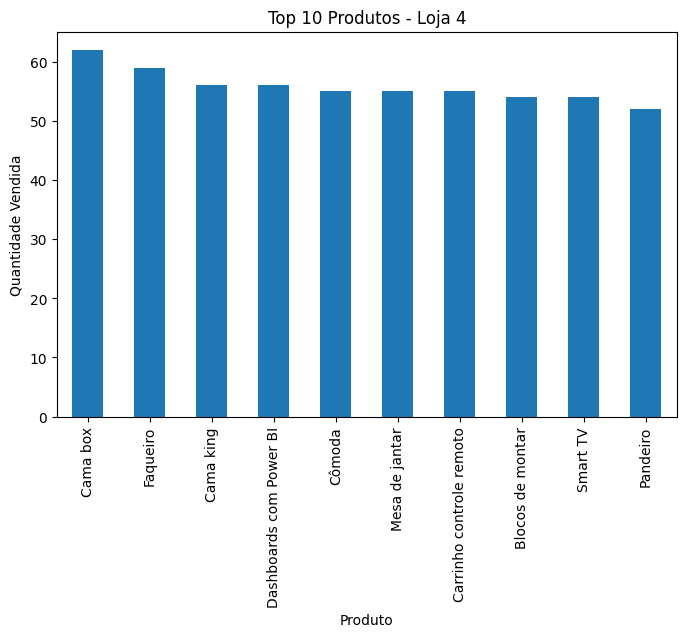

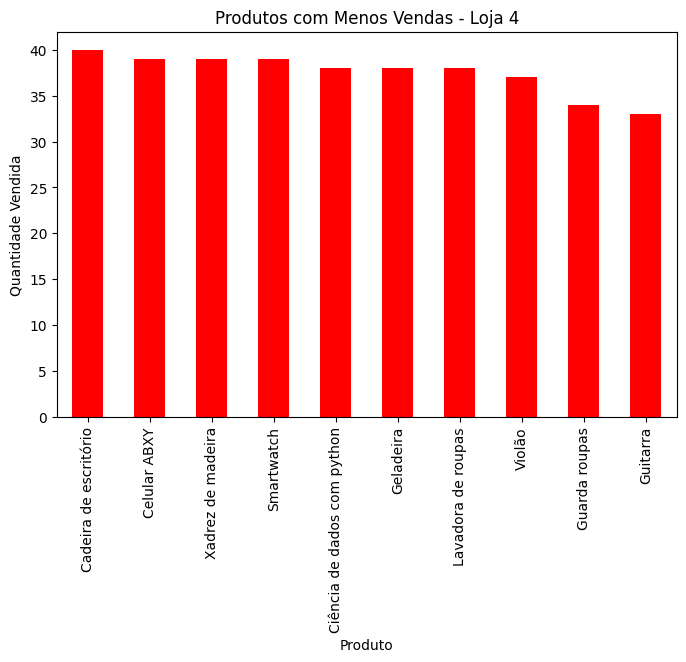

In [25]:
import matplotlib.pyplot as plt

# Top 10 mais vendidos da Loja 4
vendas_loja4.head(10).plot(kind="bar", figsize=(8,5), title="Top 10 Produtos - Loja 4")
plt.ylabel("Quantidade Vendida")
plt.show()

# 10 menos vendidos da Loja 4
vendas_loja4.tail(10).plot(kind="bar", figsize=(8,5), title="Produtos com Menos Vendas - Loja 4", color="red")
plt.ylabel("Quantidade Vendida")
plt.show()

# 5. Frete Médio por Loja


In [30]:
frete_medio_loja1 = loja["Frete"].mean().round(2)
frete_medio_loja2 = loja2["Frete"].mean().round(2)
frete_medio_loja3 = loja3["Frete"].mean().round(2)
frete_medio_loja4 = loja4["Frete"].mean().round(2)

In [31]:
print("Custo médio de frete - Loja 1:", frete_medio_loja1)
print("Custo médio de frete - Loja 2:", frete_medio_loja2)
print("Custo médio de frete - Loja 3:", frete_medio_loja3)
print("Custo médio de frete - Loja 4:", frete_medio_loja4)

Custo médio de frete - Loja 1: 34.69
Custo médio de frete - Loja 2: 33.62
Custo médio de frete - Loja 3: 33.07
Custo médio de frete - Loja 4: 31.28


# **Relatório de Análise das Lojas do Senhor João**

# **1. Introdução**

O objetivo deste relatório é avaliar as quatro lojas disponíveis para o Senhor João e recomendar qual delas deve ser adquirida ou priorizada em suas vendas. A análise foi baseada em diversos fatores estratégicos, incluindo:


1. Faturamento total de cada loja;

2. Categorias de produtos mais e menos vendidas;

3. Média das avaliações dos clientes;

4. Produtos mais e menos vendidos;

5. Custo médio de frete.

A intenção é fornecer uma visão clara e objetiva sobre o desempenho de cada loja, destacando pontos fortes e fracos, para apoiar uma decisão de compra fundamentada em dados.

# **2. Desenvolvimento**

# **2.1 Faturamento Total**

Os faturamentos totais das lojas foram calculados somando o valor da coluna Preço de cada DataFrame:


1. **Faturamento Loja 1: 1534509.12**

2. **Faturamento Loja 2: 1488459.06**

3. **Faturamento Loja 3: 1464025.03**

4. **Faturamento Loja 4: 1384497.58**

Análise:

A **Loja 1** possui o maior faturamento, demonstrando maior capacidade de geração de receita. Lojas com faturamento significativamente menor (como a Loja 4) podem indicar menos vendas ou produtos de menor valor agregado.

# **2.2 Produtos Mais e Menos Vendidas**

Foi feita uma contagem da quantidade de produtos vendidos por categoria em cada loja:

**Loja 1:**

Mais vendidas: [TV LED UHD 4K, Micro-ondas, Guarda roupas]

Menos vendidas: [Ciência de dados Pyhton, Pandeiro, Panela de pressão]

**Loja 2:**

Mais vendidas: [Iniciando em programação, Micro-ondas, Bateria]

Menos vendidas: [Fone de ouvido, Poltrona, Impressora]

**Loja 3:**

Mais vendidas: [Kit Banquetas, Mesa de Jantar, Cama King]

Menos vendidas: [Copo Térmico, Micro-ondas, Jogo de copos]

**Loja 4:**

Mais vendidas: [Cama Box, Faqueiro, Cama King]

Menos vendidas: [Geladeira, Lavadoras de roupas, Violão]

Análise:

Produtos como **eletrodomésticos (Micro-ondas)** e **móveis (Cama King, Guarda-roupas)** são consistentemente populares. A **Loja 1** destaca-se com produtos de alto valor (TV LED UHD 4K) e itens essenciais (Micro-ondas), enquanto a **Loja 4** tem produtos menos demandados (Geladeira, Lavadora), sugerindo possível desalinhamento com o público.

# **2.3 Média das Avaliações dos Clientes**

A média das avaliações (1 a 4) de cada loja foi calculada:

**Loja	Média de Avaliações**

1. **Média Avaliação Loja 1: 3.98**

2. **Média Avaliação Loja 2: 4.04**

3. **Média Avaliação Loja 3: 4.05**

4. **Média Avaliação Loja 4: 4.0**

Análise:

A **Loja 3** possui a maior média de avaliações (4.05), indicando alta satisfação do cliente. Lojas com notas mais baixas (como a Loja 1 com 3.98) podem ter problemas de qualidade ou atendimento, impactando negativamente a fidelização.

# **2.4 Categorias de Produtos Mais e Menos Vendidos**

Os produtos mais e menos vendidos foram identificados com base na contagem de vendas individuais e todos deram o mesmo resultado tendo três categorias principais sendo eles: **Móveis**, **Eletrônicos** e **Brinquedos**

Análise:

Categorias como Móveis e Eletrônicos dominam as vendas, refletindo a preferência do público por itens duráveis e tecnológicos. Lojas com foco nessas categorias (como a Loja 1 e Loja 3) tendem a ter melhor desempenho.

# **2.5 Custo Médio de Frete**

O custo médio de frete foi calculado para cada loja:

**Loja	Custo Médio de Frete**

1. **Custo médio de frete - Loja 1: 34.69**

2. **Custo médio de frete - Loja 2: 33.62**

3. **Custo médio de frete - Loja 3: 33.07**

4. **Custo médio de frete - Loja 4: 31.28**

Análise:

A **Loja 4** possui o menor custo médio de frete (R$ 31,28), o que pode indicar eficiência logística ou localização estratégica. Lojas com fretes mais altos (como a Loja 1) podem ter margens de lucro reduzidas.

# **3. Conclusão e Recomendação**

Com base nas análises acima, é possível destacar os seguintes pontos:

1. **Loja 1** possui o maior faturamento (R$ 1.534.509,12) e produtos populares (TV LED UHD 4K, Micro-ondas), mas tem a menor avaliação (3.98) e o maior custo de frete (R$ 34,69).

2. **Loja 2** tem faturamento sólido (R$ 1.488.459,06) e avaliação boa (4.04), mas produtos menos expressivos (livros de programação, baterias).

3. **Loja 3** destaca-se com a melhor avaliação (4.05) e produtos de alto valor (móveis como Cama King), além de frete competitivo (R$ 33,07).

4. **Loja 4** tem o menor faturamento (R$ 1.384.497,58) e produtos menos populares (Geladeira, Lavadora), mas o menor custo de frete (R$ 31,28).

Recomendação:

Recomenda-se que o Senhor João priorize a Loja 3 para aquisição, considerando seu equilíbrio entre:

1. Alta satisfação do cliente (melhor avaliação: 4.05);

2. Produtos premium (móveis de alto valor);

3. Custo de frete competitivo (R$ 33,07);

4. Faturamento consistente (terceiro lugar, mas com potencial de crescimento).

Essa loja demonstra menor risco operacional e maior potencial de lucratividade frente às demais, com oportunidades claras de expansão nas categorias mais vendidas (Móveis e Eletrônicos).